In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Starting dataset
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)

selected_features = ['MeanProdOrder','MeanSaleOrder','MeanPSale']

df2 = df[selected_features]
df2.head()


,MeanSaleOrder,TOrder
CustomerID,,
17850,151.940,34
13047,193.069,9
12583,389.961,15
13748,189.650,5
15100,105.850,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MeanSaleOrder  4333 non-null   float64
 1   TOrder         4333 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 101.6 KB


,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15749,10314,5,9014,1970,2578.50,24850.9,2730.0,6539.4,6212.725,7714,3.044,3,3.664,2.0,3
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.650,3,2.000,2.0,3


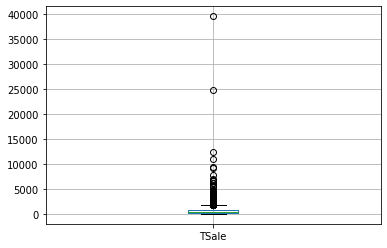

In [26]:
df2.info()
df[(df['TOrder'] < 5)].boxplot(column = 'TSale')
df[(df['TOrder'] < 5) & (df['TSale'] > 15000)]

# Normalization

In [4]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df2.to_numpy())

# K-MEANS

In [5]:
sse_list = list()
sil_list = list()
davies_list = list()
max_k = 15
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df_norm)
    
    davies_list.append(davies_bouldin_score(df_norm, kmeans_iter.labels_))
    sil_list.append(silhouette_score(df_norm, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

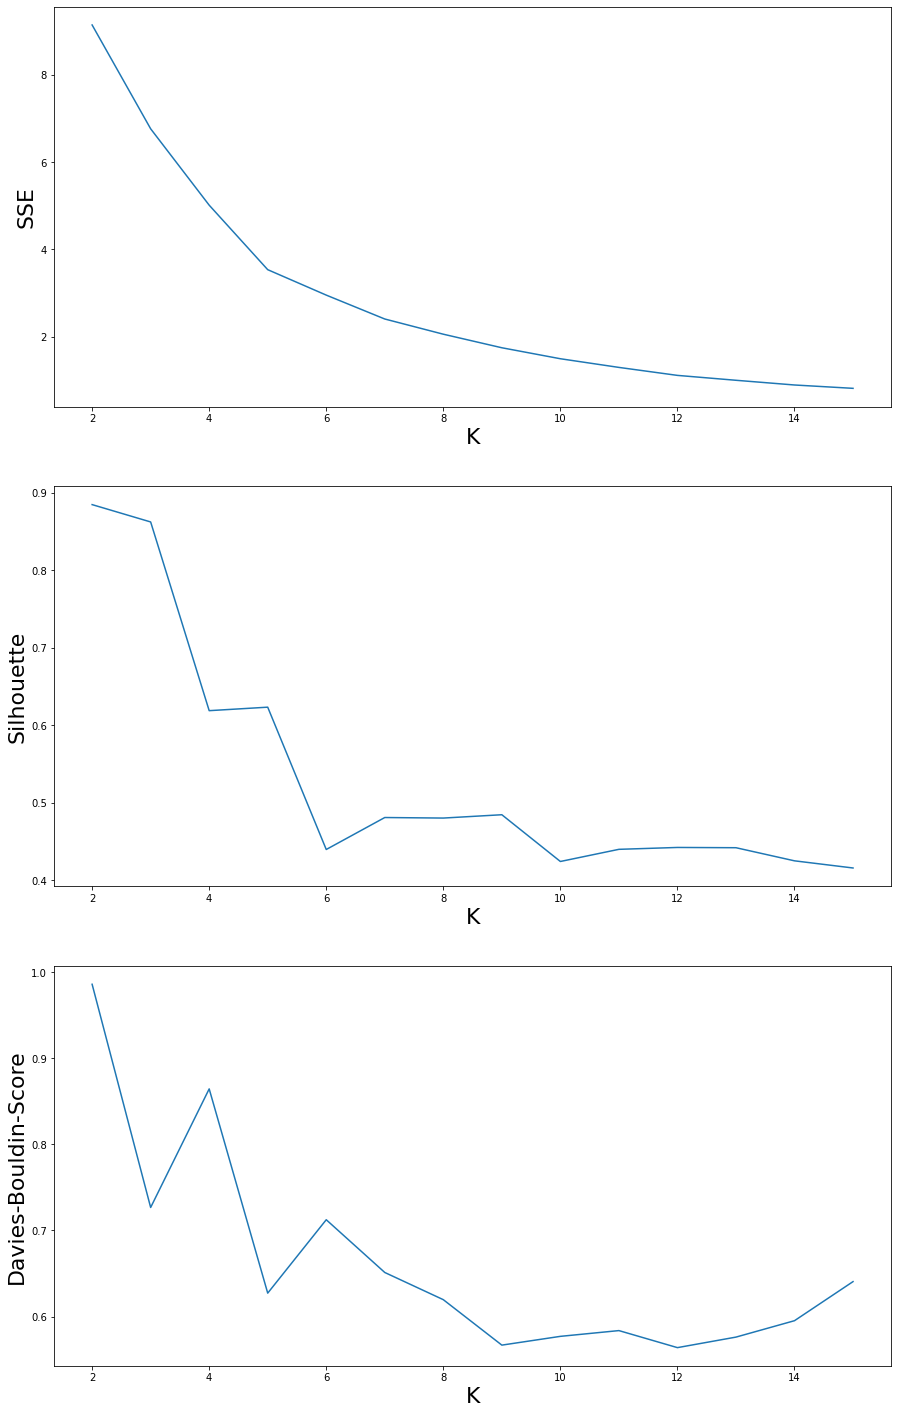

In [6]:
fig, axs = plt.subplots(3,1,figsize=(15,25))
axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=10)

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=10)

axs[2].plot(range(2, len(davies_list) + 2), davies_list)
axs[2].set_ylabel('Davies-Bouldin-Score', fontsize=22)
axs[2].set_xlabel('K', fontsize=22)
axs[2].tick_params(axis='both', which='major', labelsize=10)

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(df_norm)

KMeans(n_clusters=5, n_init=100)

In [8]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([3685,  402,    7,   19,  220], dtype=int64))

In [9]:
print("SSE:",sse_list[k-2]," - SILHOUETTE:",sil_list[k-2])
(sil_list[k-2] / 4) / ( sse_list[k-2] / 4329)

SSE: 3.5352514334529768  - SILHOUETTE: 0.6232637281420832


190.80033838581613

In [10]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 3685, 1: 402, 2: 7, 3: 19, 4: 220}

Text(0.5, 0, 'TOrder')

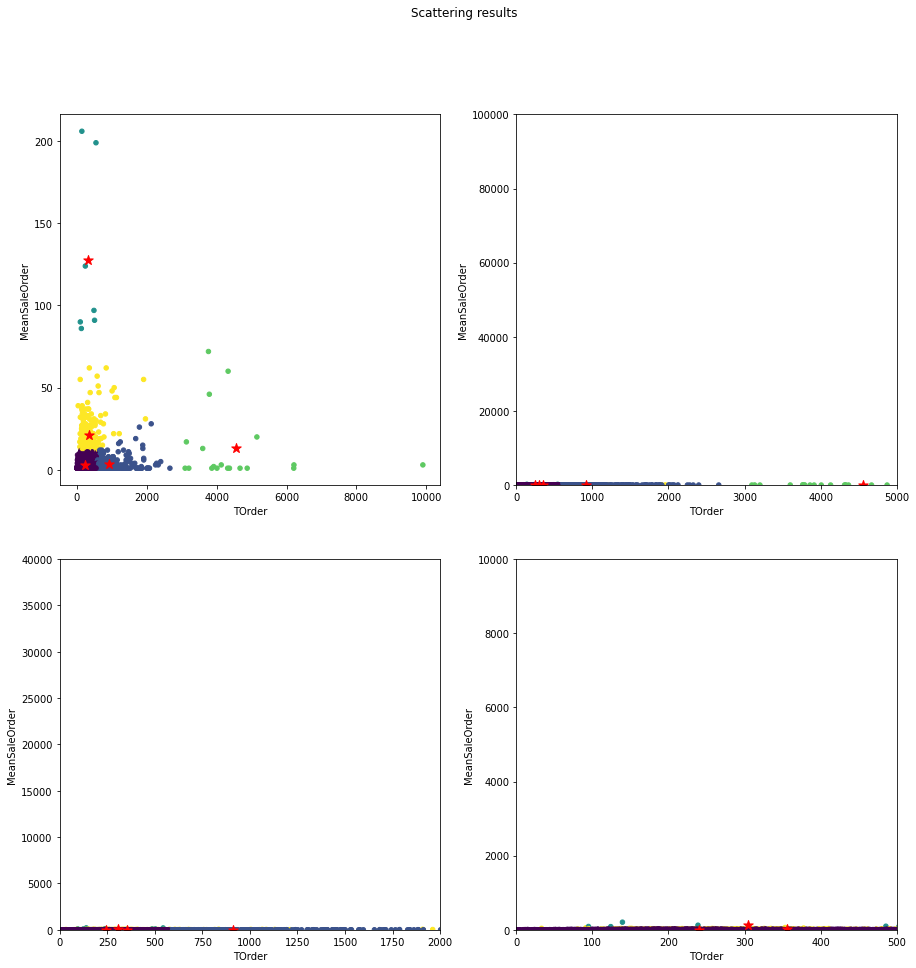

In [11]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')

label_s = 10

col1, i1 = df2['MeanSaleOrder'], 0
col2, i2 = df2['TOrder'], 1

axs[0][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[0][1].set_xlim((0,5000))
axs[0][1].set_ylim((0,100000))
axs[0][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][0].set_xlim((0,2000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][1].set_xlim((0,500))
axs[1][1].set_ylim((0,10000))
axs[1][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i2], fontsize=label_s)

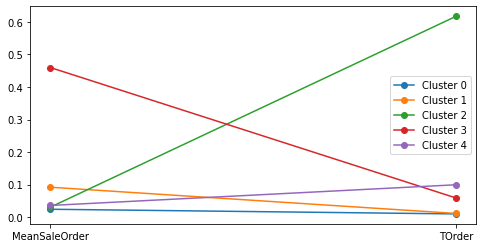

In [12]:
# normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

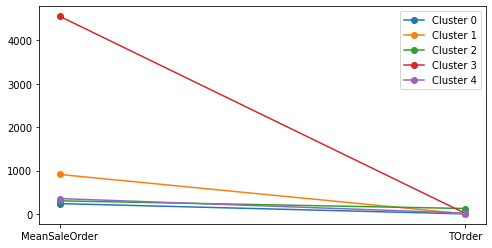

In [13]:
# non normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

# ANALYZING RESULTS

In [14]:
df['Cluster'] = kmeans.labels_

clust_list = list()
for i in tqdm(range(len(df['Cluster'].unique())), total=len(df['Cluster'].unique()), desc="Creating cluster dataframes"):
    clust_list.append(df[df['Cluster'] == i])

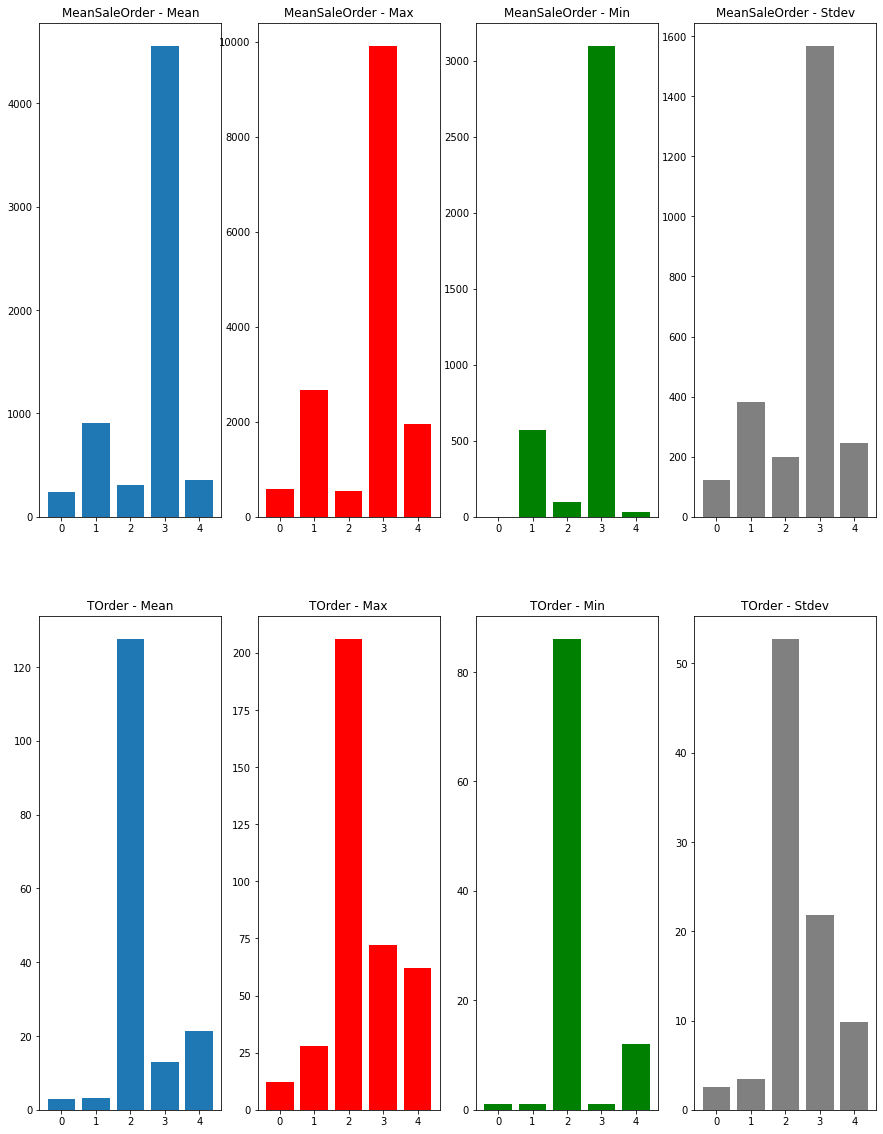

In [15]:
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),4,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    stdev_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
        stdev_values.append(cluster_df.describe()[attr[attr_index]][2])
    axs[attr_index][0].bar(clusters, mean_values)
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values, color = 'r')
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values, color = 'g')
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")
    axs[attr_index][3].bar(clusters, stdev_values, color = 'gray')
    axs[attr_index][3].set_title(f"{attr[attr_index]} - Stdev")

In [16]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
clust_dict = dict(zip(bins, hist))
print("Clusters and their population:",clust_dict)

Clusters and their population: {0: 3685, 1: 402, 2: 7, 3: 19, 4: 220}


In [17]:
clust_list[2]

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15311,37688,567,2683,12,319.390,59344.12,0.21,408.00,502.916,459,2.510,91,7.023,6.849,2
12748,23619,1766,1631,1,109.856,30005.29,0.06,528.00,139.559,1432,2.380,206,6.895,7.698,2
14911,76969,1786,4462,1,315.443,132649.70,1.45,540.00,543.646,3269,4.094,199,6.859,7.878,2
17841,22624,1322,833,1,135.473,39888.16,0.29,349.50,238.851,192,2.538,124,6.443,7.312,2
14606,6053,816,177,2,49.211,11676.42,0.12,139.30,94.930,124,2.801,90,5.964,6.833,2
12971,9204,94,618,12,104.591,10933.76,5.04,220.15,124.247,85,2.310,86,5.578,6.414,2
13089,30742,636,1892,3,260.525,57322.13,4.56,788.40,485.781,283,2.738,97,6.512,6.849,2
